C:\Users\St Antonys\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\St Antonys\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\St Antonys\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\St Antonys\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

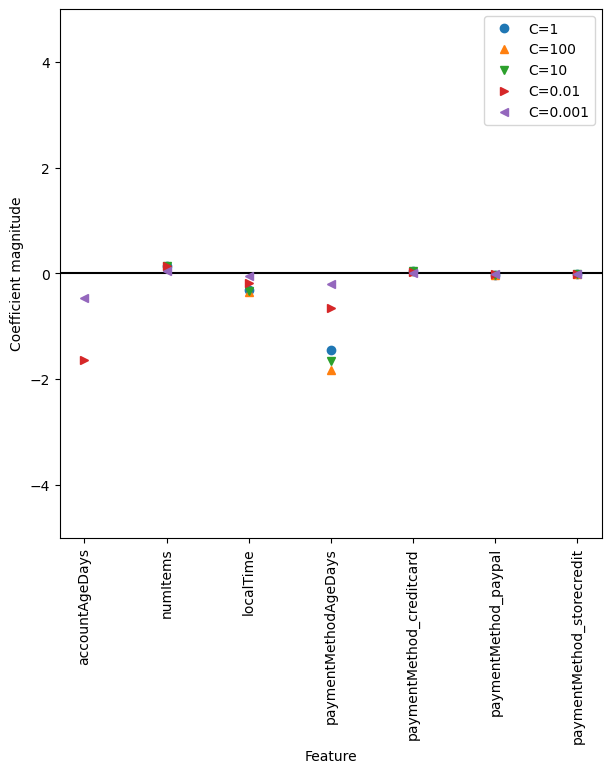

In [1]:
#import required python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

#loading data from the csv file
data = pd.read_csv('payment_fraud.csv')

#Convert categorical feature into dummy variables with one-hot encoding
data = pd.get_dummies(data, columns=['paymentMethod'])
#data.head()

x = pd.DataFrame(data,columns=['accountAgeDays','numItems','localTime','paymentMethodAgeDays','paymentMethod_creditcard', 'paymentMethod_paypal','paymentMethod_storecredit'])
y = pd.DataFrame(data,columns=['label'])
y = y.astype('int')

#Splitting the datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 101)

#apply a supervised learning algorithm logistic regression
#building logistic regression models with C=1
logreg1 = LogisticRegression(C=1).fit(X_train, y_train)

#building logistic regression models with C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

#building logistic regression models with C=10
logreg10 = LogisticRegression(C=10).fit(X_train, y_train)

#building logistic regression models with C=0.01
logreg_0_point_01 = LogisticRegression(C=0.01).fit(X_train, y_train)

#building logistic regression models with C=0.001
logreg_0_point_001 = LogisticRegression(C=0.001).fit(X_train, y_train)

#plotting to visualize the coefficients of the above models

fig, ax = plt.subplots(figsize=(7, 7), dpi = 100)
plt.plot(logreg1.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg10.coef_.T, 'v', label="C=10")
plt.plot(logreg_0_point_01.coef_.T, '>', label="C=0.01")
plt.plot(logreg_0_point_001.coef_.T, '<', label="C=0.001")

plt.xticks(range(x.shape[1]), x.columns, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend();

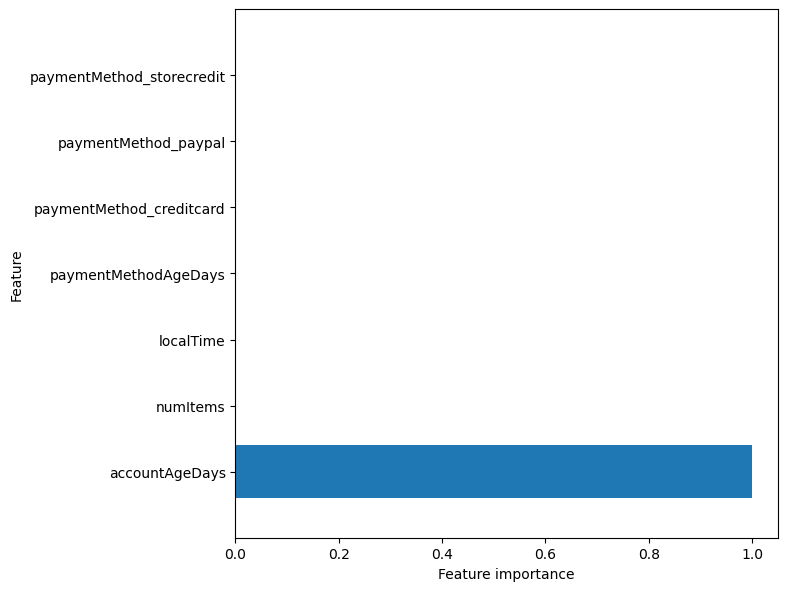

In [2]:
#applying a supervised learning algorithm decision tree to this data
#printing the training set score and test set score of the decision tree model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

#plotting to visualize the decision tree feature importances
def plot_feature_importances_payment_fraud(model):
    
    fig, ax = plt.subplots(figsize=(7, 7), dpi = 100)
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_payment_fraud(tree)

Please give some guide regarding this task because we couldn't get same graph mentioned in the task description